In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import sys
import math
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

sys.path.append('../')
from higgs_inference import settings

In [63]:
ptmin, ptmax = 0., 600.
n_bins = 12

binsize = (ptmax - ptmin) / n_bins
bin_middles = np.linspace(ptmin + binsize/2 , ptmax - binsize/2 , n_bins)

9 [-0.5 -0.5] 475.0
13 [-1. -1.] 375.0
17 [-0.99977661 -0.72535637] 325.0
18 [-0.99849038  0.13674514] 375.0
19 [-0.99363937 -0.24264621] 375.0
20 [-0.99018862  0.29001175] 475.0
21 [-0.99001034  0.12161145] 375.0
23 [-0.98859265 -0.40941243] 375.0
24 [-0.98559634 -0.63717827] 325.0
25 [-0.98522774 -0.12924231] 375.0
26 [-0.9781217   0.23700188] 475.0
27 [-0.97760686 -0.30977076] 325.0
30 [-0.97236472 -0.01248182] 375.0
35 [-0.95441757  0.47148343] 475.0
36 [-0.95382857 -0.79313087] 375.0
37 [-0.95370299 -0.14644991] 375.0
39 [-0.95133402  0.57034919] 475.0
40 [-0.9483803   0.43107104] 475.0
41 [-0.9466884  -0.84207419] 325.0
44 [-0.94036398  0.14433632] 375.0
45 [-0.93864497 -0.20102259] 375.0
47 [-0.93542439 -0.97620146] 325.0
49 [-0.93085102 -0.76786446] 325.0
50 [-0.93042815  0.12899857] 425.0
51 [-0.9269444  -0.95681223] 325.0
53 [-0.92561801 -0.21787504] 475.0
54 [-0.92476776  0.26418742] 475.0
55 [-0.92401207 -0.80766047] 375.0
57 [-0.92016324  0.95722702] 475.0
58 [-0.91682215 

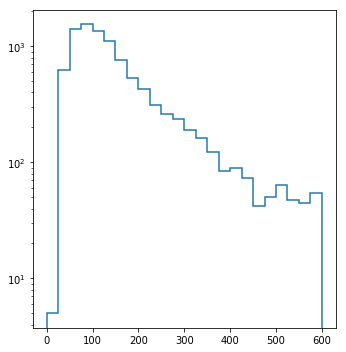

In [64]:
minimums = []

for t in range(settings.n_thetas):
    
    X = np.load('../data/unweighted_events/neyman/X_neyman2_null_' + str(t) + '.npy')
    pt = X[:,:,1].flatten()
    
    histo, _ = np.histogram(pt, range=(ptmin, ptmax), bins=n_bins)
    minimum = np.argmin(histo)
    if bin_middles[minimum] < 500.:
        print(t, settings.thetas[t], bin_middles[minimum])
    
    if t == 734:
        plt.figure(figsize=(5,5))
        ax = plt.gca()
        plt.hist(pt, range=(ptmin, ptmax), bins=n_bins*2, histtype='step', lw=1.5, ls='-')
        plt.tight_layout()
        ax.set_yscale("log", nonposy='clip')
        plt.show()
    
    minimums.append(minimum)
    
minimums = np.array(minimums)
pt_dips = bin_middles[minimums]

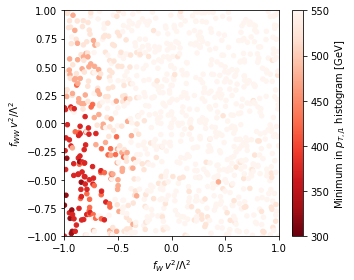

In [67]:
plt.figure(figsize=(5.,4.))

skip = 1
rmin, rmax = 0.,2.



plt.scatter(settings.thetas[:,0], settings.thetas[:,1],
            c=pt_dips, cmap='Reds_r', vmin=300., vmax=550., s=20.)
cbar = plt.colorbar()

plt.xlabel(r"$f_{W} \, v^2 / \Lambda^2$")
plt.ylabel(r"$f_{WW} \, v^2 / \Lambda^2$")
cbar.set_label(r'Minimum in $p_{T,j1}$ histogram [GeV]')
plt.xlim(-1.,1.)
plt.ylim(-1.,1.)



plt.tight_layout()
plt.show()
